# Introduction

This notebook demonstrates how to use the `PDynA` code to perform a simple structural analysis on molecular dynamics (MD) trajectory in the VASP format. Specifically, we will use the `Trajectory` class to read and process a set of VASP output files. 

The first step is to read the inputs file by initializing the `Trajectory` class with a fixed array of inputs (detailed format can be found in the Docs). Then the `Trajectory.dynamics()` method can be called to perform the computation, with a wide variety of options. 

------------------------------------------------------------
Loading Trajectory files...
Current sample: MAPI_test
Time Span: 50.0 ps
Frame count: 2000
Reading from frame no.1000
Reading every 1 frame(s)
Number of atoms: 96
Temperature: 100.0K
 
A-sites are -> MA: 8


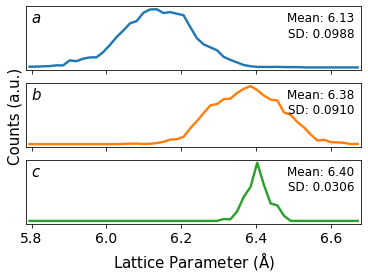

Pseudo-cubic lattice parameter:  [6.1346 6.3752 6.4034]

Computing octahedral tilting and distortion...


100%|██████████| 1000/1000 [00:27<00:00, 36.79it/s]


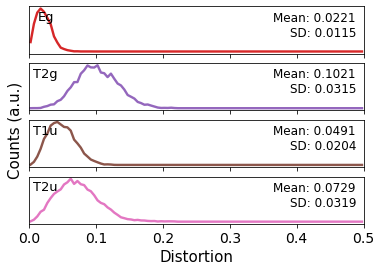

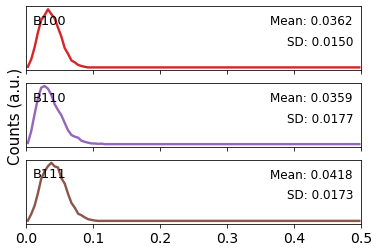

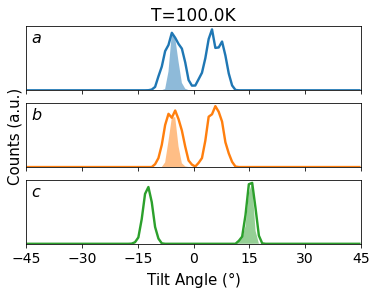

dynamic X-site distortion: [0.0221 0.1021 0.0491 0.0729]
dynamic B-site distortion: [0.0362 0.0359 0.0418]
dynamic tilting: [ 5.25  5.85 14.25]
tilting correlation: [-1. -1.  1.]
 


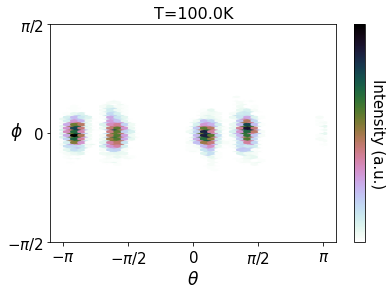

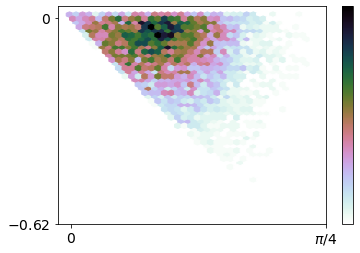

 
--Elapsed Time
Data Reading:          00:00:02
Structure Resolving:   00:00:00
Lattice Parameter:     00:00:01
Tilting & Distortion:  00:00:28
Molecular Orientation: 00:00:02
Total:                 00:00:32
------------------------------------------------------------


In [1]:
# Import necessary module
from pdyna.core import Trajectory

# Create a Trajectory object with reading the VASP output files
traj = Trajectory("vasp", ("POSCAR_mapi_example", "XDATCAR_mapi_example", "INCAR_mapi_example"))

# Call the dynamics method on the Trajectory object
traj.dynamics(
    uniname="MAPI_test",        # A unique user-defined name for this trajectory, will be used in printing and figure saving
    read_mode=1,                # key parameter, 1: equilibration mode, 2: quench/anneal mode

    toggle_lat = True,          # switch of lattice parameter calculation
    toggle_tilt_distort = True, # switch of octahedral tilting and distortion calculation
    toggle_MO = True,           # switch of molecular orientation (MO) calculation (for organic A-site)

    lat_method=2,               # enable pseudo-cubic lattice parameter
)

In [2]:
# The computed properties can be accessed directly from the traj object for your own use
print("The shape of lattice parameter array is: ",traj.Lat.shape)                 # All the output proerty arrays have shape (N_frame, N_object, N_property), 
print("The shape of octahedral tilting array is: ",traj.Tilting.shape)            # where N_frame is the number of computed frames in the trajectory,
print("The shape of NN1 tilting correlation array is: ",traj.Tilting_Corr.shape)  # N_object is the number of objects (e.g. octahedra, molecules, etc.), 
print("The shape of octahedral distortion array is: ",traj.Distortion.shape)      # and N_property is the dimension of properties (e.g. tilt angles - three axes, distortion - four modes, etc.)

The shape of lattice parameter array is:  (1000, 8, 3)
The shape of octahedral tilting array is:  (1000, 8, 3)
The shape of NN1 tilting correlation array is:  (1000, 8, 3)
The shape of octahedral distortion array is:  (1000, 8, 4)
